In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
# Hard coded Original results

gpt_raw = 0.56       # ChatGPT original accuracy
gemini_raw = 0.36    # Gemini original accuracy

phase1_scores = pd.DataFrame([
    {"model": "ChatGPT (raw)", "accuracy_pct": int(round(gpt_raw * 100))},
    {"model": "Gemini (raw)",  "accuracy_pct": int(round(gemini_raw * 100))},
])

phase1_scores

,model,accuracy_pct
0,ChatGPT (raw),56
1,Gemini (raw),36


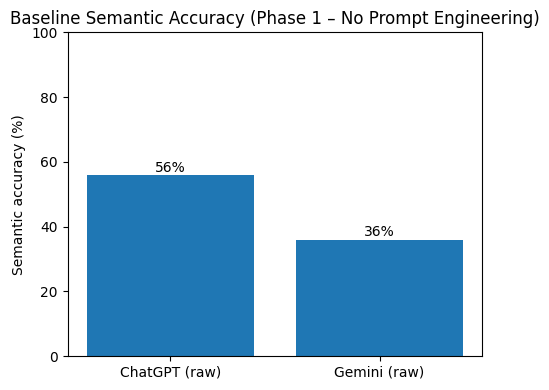

Saved Phase 1 baseline chart to: evaluation\graphs_phase1\phase1_baseline_chart.png


In [7]:
# Chart for Original: ChatGPT vs Gemini

plt.figure(figsize=(5, 4))
plt.bar(phase1_scores["model"], phase1_scores["accuracy_pct"])

plt.ylim(0, 100)
plt.ylabel("Semantic accuracy (%)")
plt.title("Baseline Semantic Accuracy (Phase 1 – No Prompt Engineering)")

# Label for bars
for x, y in zip(phase1_scores["model"], phase1_scores["accuracy_pct"]):
    plt.text(x, y + 1, f"{y}%", ha="center")

plt.tight_layout()

# Save figure
graphs_dir = Path("evaluation") / "graphs_phase1"
graphs_dir.mkdir(parents=True, exist_ok=True)

save_path = graphs_dir / "phase1_baseline_chart.png"
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved Phase 1 baseline chart to:", save_path)

In [8]:
# Load Phase 2 prompt engineered scores (from CSV)

eval_dir = Path("evaluation")

phase2_scores_path = eval_dir / "phase2_prompt_scores.csv"
phase2_scores = pd.read_csv(phase2_scores_path)

# Convert accuracy to whole number percentages
phase2_scores["accuracy_pct"] = (phase2_scores["semantic_accuracy"] * 100).round().astype(int)

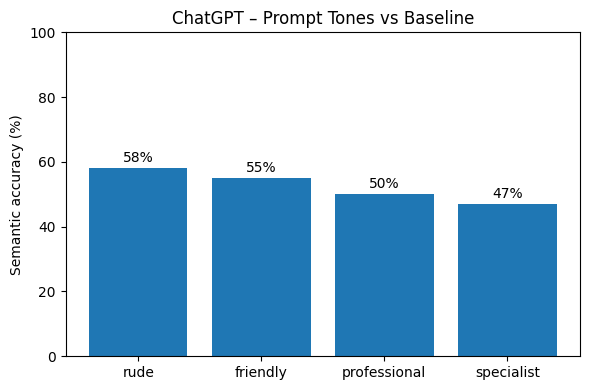

Saved ChatGPT tones chart to: evaluation\graphs_phase2\chatgpt_tones.png


In [10]:
# Chart for ChatGPT: Prompt tones vs Original baseline

# Use the original hard coded baseline from above
gpt_base_pct = int(round(gpt_raw * 100))

# (GPT vs Gemini) + tone
def parse_label(label: str):
    if label.startswith("gpt"):
        model = "ChatGPT"
    elif label.startswith("gemini"):
        model = "Gemini"
    else:
        model = "Unknown"

    tone = label.split("_", 1)[1] if "_" in label else "baseline"
    return model, tone

phase2_scores[["model", "tone"]] = phase2_scores["model_label"].apply(
    lambda s: pd.Series(parse_label(s))
)

gpt_tones = phase2_scores[phase2_scores["model"] == "ChatGPT"].copy()

plt.figure(figsize=(6, 4))
plt.bar(gpt_tones["tone"], gpt_tones["accuracy_pct"])

plt.ylim(0, 100)
plt.ylabel("Semantic accuracy (%)")
plt.title("ChatGPT – Prompt Tones vs Baseline")

# Labels on bars
for x, y in zip(gpt_tones["tone"], gpt_tones["accuracy_pct"]):
    plt.text(x, y + 2, f"{y}%", ha="center")

plt.tight_layout()

graphs_dir2 = eval_dir / "graphs_phase2"
graphs_dir2.mkdir(parents=True, exist_ok=True)

save_path = graphs_dir2 / "chatgpt_tones.png"
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved ChatGPT tones chart to:", save_path)

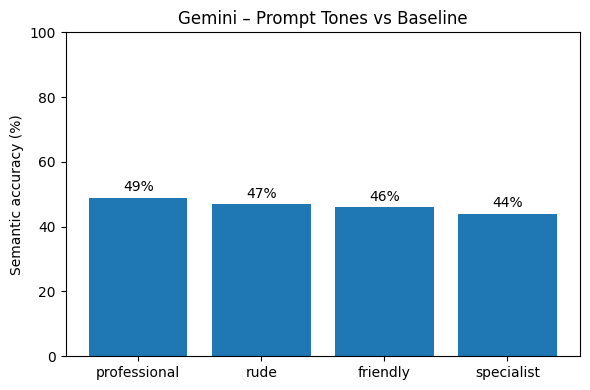

Saved Gemini tones chart to: evaluation\graphs_phase2\gemini_tones.png


In [11]:
# Chart for Gemini: Prompt tones vs Original baseline

gemini_base_pct = int(round(gemini_raw * 100))

gemini_tones = phase2_scores[phase2_scores["model"] == "Gemini"].copy()

plt.figure(figsize=(6, 4))
plt.bar(gemini_tones["tone"], gemini_tones["accuracy_pct"])

plt.ylim(0, 100)
plt.ylabel("Semantic accuracy (%)")
plt.title("Gemini – Prompt Tones vs Baseline")

for x, y in zip(gemini_tones["tone"], gemini_tones["accuracy_pct"]):
    plt.text(x, y + 2, f"{y}%", ha="center")

plt.tight_layout()

save_path = graphs_dir2 / "gemini_tones.png"
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved Gemini tones chart to:", save_path)

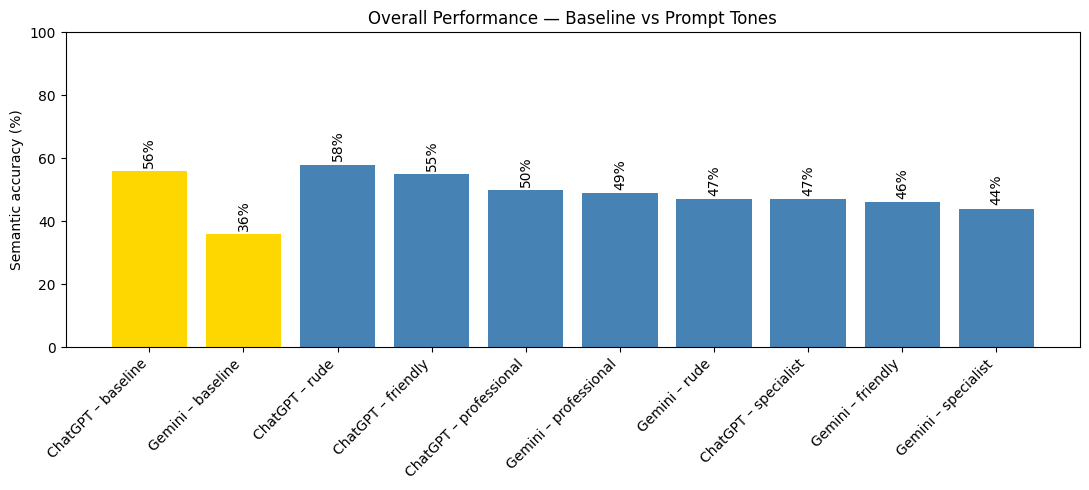

Saved combined scoreboard chart to: evaluation\graphs_phase2\combined_scoreboard.png


In [14]:
# Combined scoreboard: Original baseline + all prompt tones (baseline highlighted)

phase1_combined = pd.DataFrame([
    {"model": "ChatGPT", "tone": "baseline", "accuracy_pct": int(round(gpt_raw * 100))},
    {"model": "Gemini",  "tone": "baseline", "accuracy_pct": int(round(gemini_raw * 100))},
])

# Combine everything
combined = pd.concat(
    [phase1_combined, phase2_scores[["model", "tone", "accuracy_pct"]]],
    ignore_index=True
)

# Labels for X-axis
labels = combined["model"] + " – " + combined["tone"]

# Color coding: Baseline = Yellow/Gold and Others = Blue
colors = [
    "gold" if tone == "baseline" else "steelblue"
    for tone in combined["tone"]
]

plt.figure(figsize=(11, 5))
plt.bar(labels, combined["accuracy_pct"], color=colors)

plt.ylim(0, 100)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Semantic accuracy (%)")
plt.title("Overall Performance — Baseline vs Prompt Tones")

# Label bar values
for x, y in zip(labels, combined["accuracy_pct"]):
    plt.text(x, y + 1, f"{y}%", ha="center", rotation=90, va="bottom")

plt.tight_layout()

save_path = graphs_dir2 / "combined_scoreboard.png"
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved combined scoreboard chart to:", save_path)